# Step 3: Descriptive Analytics

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
energy_df = pd.read_csv('energy.csv')
temperature_df = pd.read_csv('temperature.csv')

# Drop irrelevant columns if needed
if 'Unnamed: 13' in temperature_df.columns:
    temperature_df = temperature_df.drop(columns=['Unnamed: 13', 'Unnamed: 14'])

# Melt to long format
energy_long = energy_df.melt(id_vars='State', var_name='Month', value_name='Energy_Consumption')
temperature_long = temperature_df.melt(id_vars='State', var_name='Month', value_name='Temperature')

# Merge on State + Month
merged_df = pd.merge(energy_long, temperature_long, on=['State', 'Month'])

In [ ]:
# Basic statistics
print(merged_df[['Temperature', 'Energy_Consumption']].describe())

       Temperature  Energy_Consumption
count   288.000000          288.000000
mean     79.753472         3312.996528
std      18.908315         3494.037022
min       0.000000          140.000000
25%      71.750000         1013.500000
50%      84.000000         2318.000000
75%      92.250000         4073.250000
max     114.000000        20201.000000


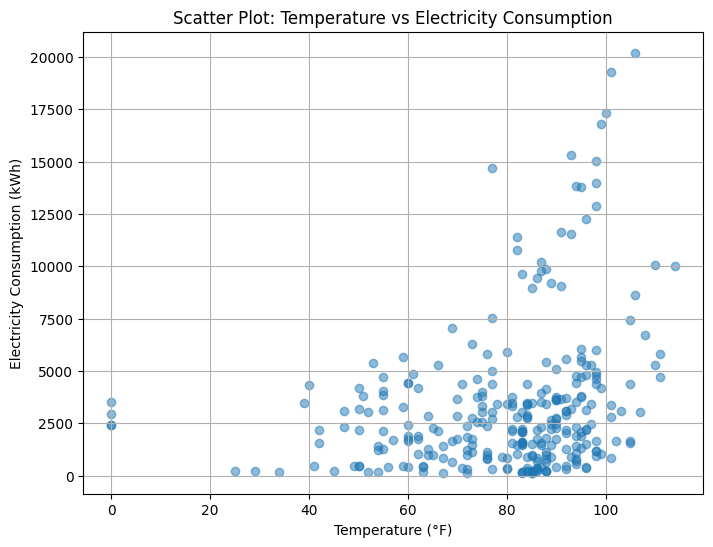

In [ ]:
# Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(merged_df['Temperature'], merged_df['Energy_Consumption'], alpha=0.5)
plt.title('Scatter Plot: Temperature vs Electricity Consumption')
plt.xlabel('Temperature (°F)')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()

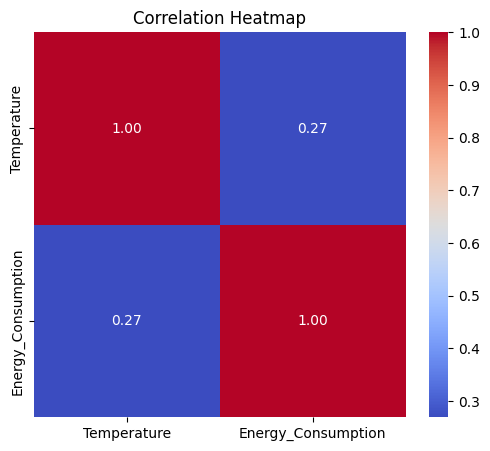

In [ ]:

# Correlation Heatmap
corr_matrix = merged_df[['Temperature', 'Energy_Consumption']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

*– The p-value is smaller than 0.05, therefore, the two variables are
correlated*

# Step 4: Predictive Analytics

**Response Variable** 

*Electricity Consumption (kWh)*

**Predictor Variable** 

*Average Temperature (°F)*

Intercept: -657.71
Slope: 49.79
R² score: 0.0726


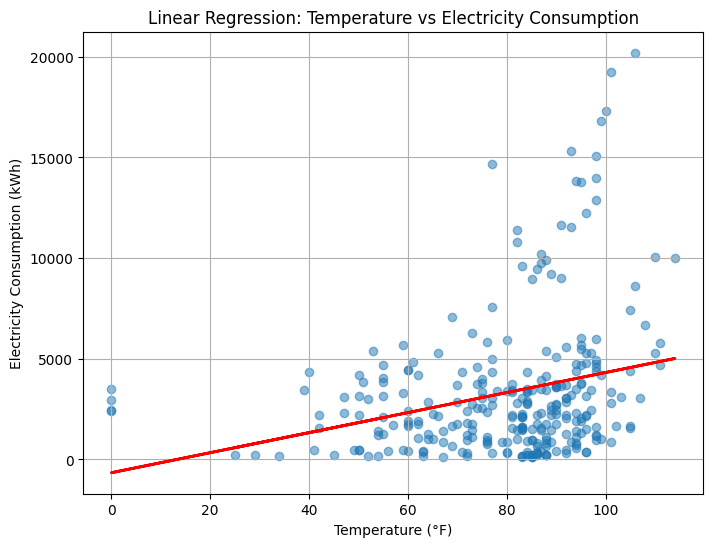

In [ ]:

from sklearn.linear_model import LinearRegression

# Prepare data
X = merged_df[['Temperature']]
y = merged_df['Energy_Consumption']

# Build Simple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"R² score: {model.score(X, y):.4f}")

# Plot Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Temperature vs Electricity Consumption')
plt.xlabel('Temperature (°F)')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()


# Step 5: Intermediate - Feature Engineering (Cooling Degree Days)

In [ ]:

# Feature Engineering: Cooling Degree Days (CDD)
merged_df['CDD'] = merged_df['Temperature'].apply(lambda x: max(x - 65, 0))

# Multiple Linear Regression with Temperature and CDD
X_multi = merged_df[['Temperature', 'CDD']] 
y_multi = merged_df['Energy_Consumption']

model_multi = LinearRegression() 
model_multi.fit(X_multi, y_multi) 

print(f"Intercept: {model_multi.intercept_:.2f}")
print(f"Coefficients: {model_multi.coef_}")
print(f"R² score (Multiple Regression): {model_multi.score(X_multi, y_multi):.4f}")

Intercept: 2857.45


Coefficients: [-20.45755384 117.30798649]
R² score (Multiple Regression): 0.1083


*Boxplots by State to explore energy usage distribution.*

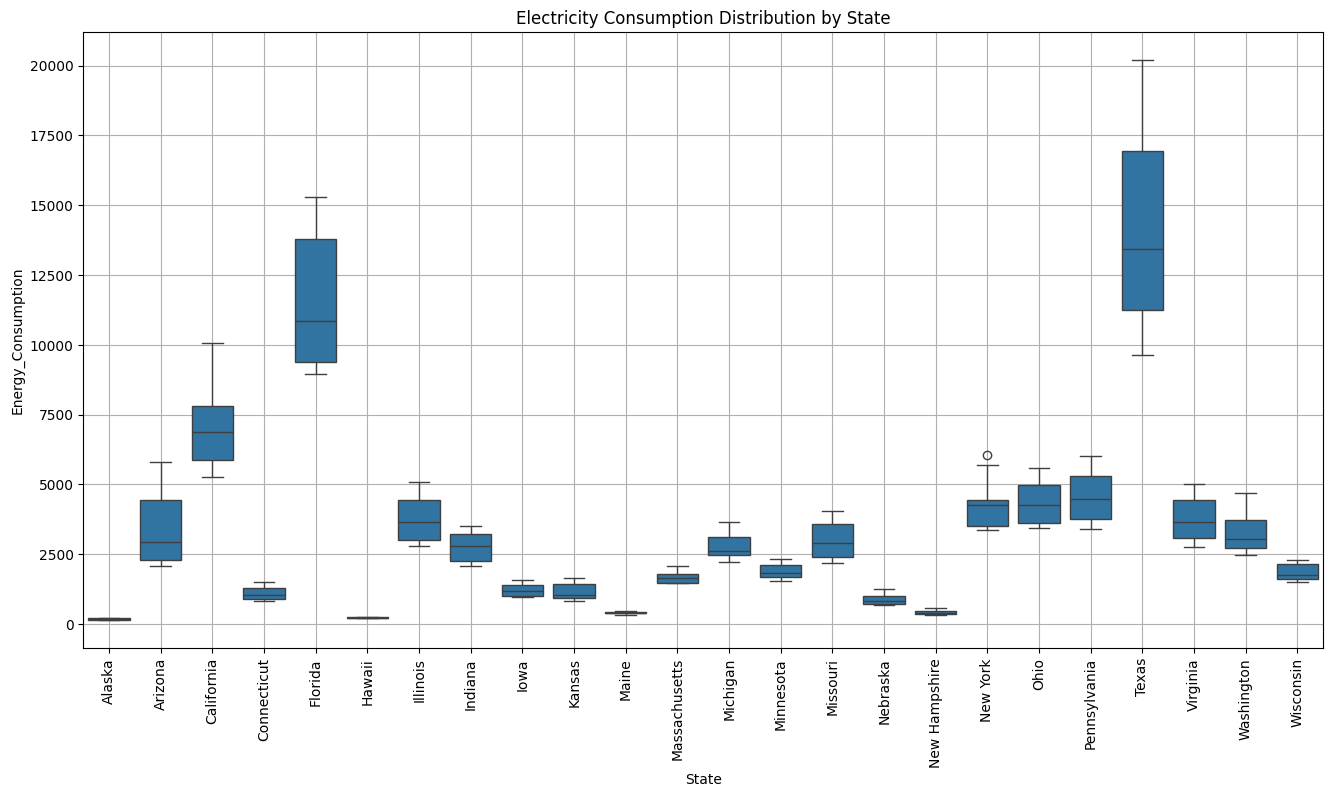

In [ ]:

# Boxplot by State
plt.figure(figsize=(16,8))
sns.boxplot(x='State', y='Energy_Consumption', data=merged_df)
plt.xticks(rotation=90)
plt.title('Electricity Consumption Distribution by State')
plt.grid(True)
plt.show()


In [ ]:
# State with the highest temperature
highest_temp_row = merged_df.loc[merged_df['Temperature'].idxmax()]
highest_temp_state = highest_temp_row['State']
highest_temp = highest_temp_row['Temperature']
highest_temp_energy = highest_temp_row['Energy_Consumption']

print(f"State with highest temperature: {highest_temp_state}, Temperature: {highest_temp}, Energy Consumption: {highest_temp_energy}")

# State with the highest energy consumption
highest_energy_row = merged_df.loc[merged_df['Energy_Consumption'].idxmax()]
highest_energy_state = highest_energy_row['State']
highest_energy = highest_energy_row['Energy_Consumption']
highest_energy_temp = highest_energy_row['Temperature']

print(f"State with highest energy consumption: {highest_energy_state}, Energy Consumption: {highest_energy}, Temperature: {highest_energy_temp}")

State with highest temperature: California, Temperature: 114, Energy Consumption: 10010
State with highest energy consumption: Texas, Energy Consumption: 20201, Temperature: 106


*State-by-Month Heatmap of Electricity Consumption.*

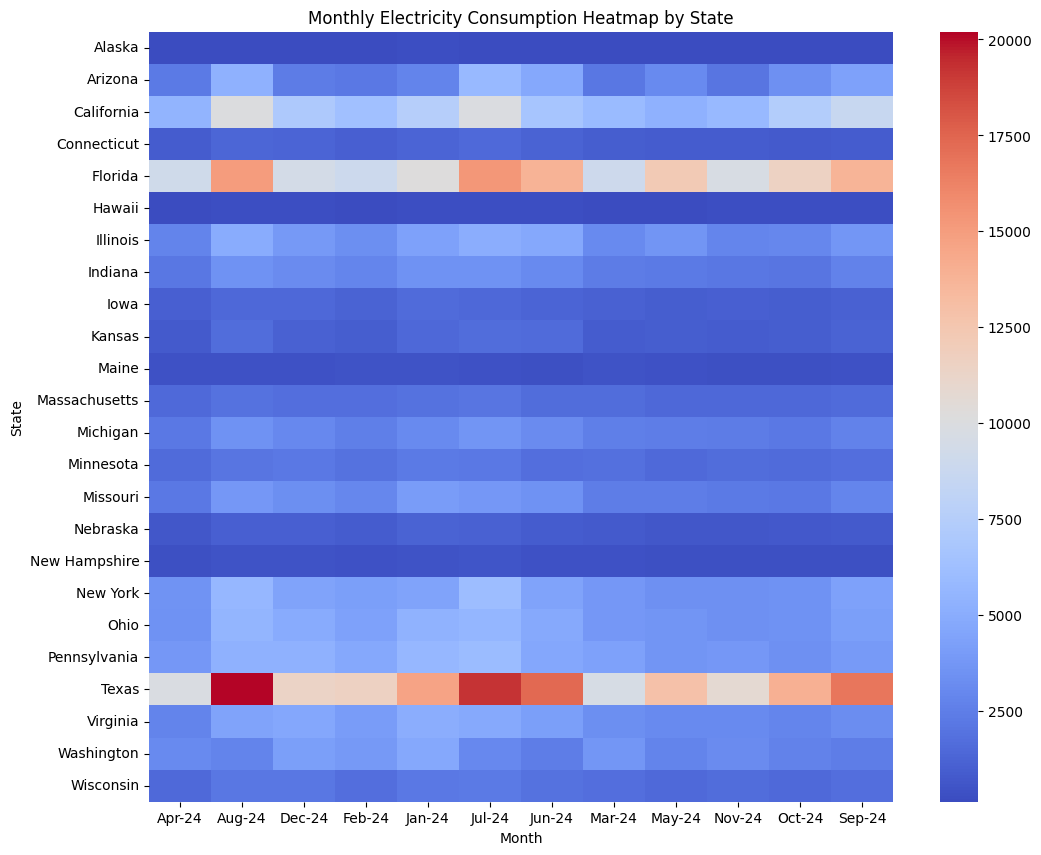

In [ ]:
# Heatmap: State vs Month
pivot_table = merged_df.pivot_table(values='Energy_Consumption', index='State', columns='Month')
plt.figure(figsize=(12,10))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Monthly Electricity Consumption Heatmap by State')
plt.show()

# Step 6: Advanced - Model Evaluation

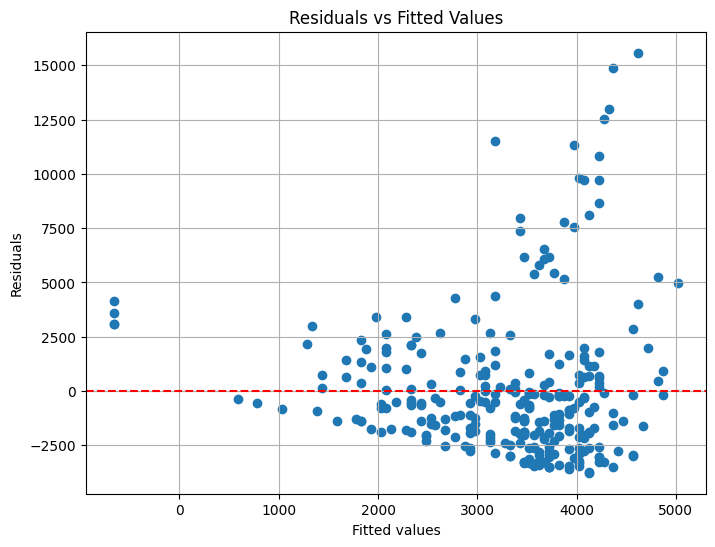

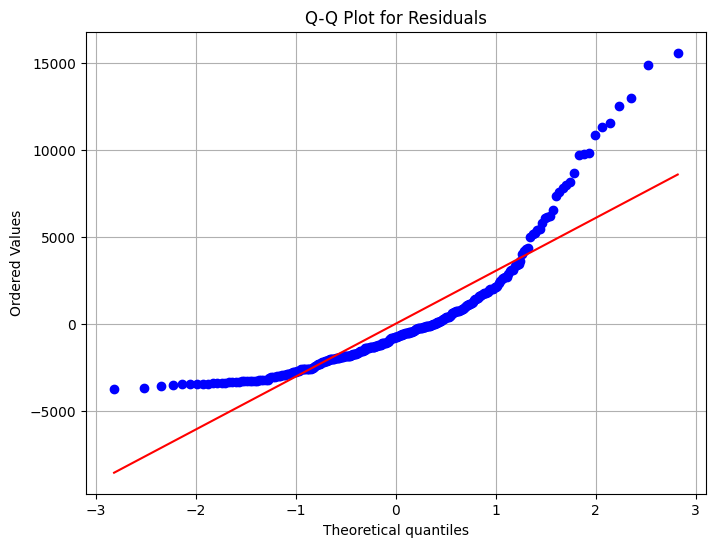

In [ ]:
import scipy.stats as stats

# Residual Analysis
y_pred = model.predict(X)
residuals = y - y_pred

# Residuals vs Fitted
plt.figure(figsize=(8,6))
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Q-Q plot for residuals
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.grid(True)
plt.show()
